* ÏñºÍµ¥ Í∞ÅÍ∞ÅÏùò ÏúÑÏπòÎ•º Ï∞æÏïÑÎÇ¥Îäî Í∏∞Ïà† = landmark, alignment => Îçî ÌÅ∞ ÏùòÎØ∏Î°† keypoint detection

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

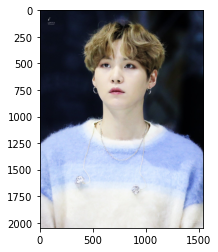

In [138]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### cv2.imread
cv2.imread(fileName, flag)    
**flag**    
* 1 : cv2.IMREAD_COLOR => Ïù¥ÎØ∏ÏßÄÎ•º ColorÎ°úÏùΩÏñ¥Îì§Ïù∏Îã§. Ìà¨Î™ÖÌïú Î∂ÄÎ∂ÑÏùÄ Î¨¥ÏãúÍ∞Ä ÎêúÎã§.
* 0 : cv2.IMREAD_GRAYSCALE => Ïù¥ÎØ∏ÏßÄÎ•º GrayColorÎ°úÏùΩÏñ¥Îì§Ïù∏Îã§.
* -1 : cv2.IMREAD_UNCHANGED => Ïù¥ÎØ∏ÏßÄÎ•º alpha channelÍπåÏßÄ Ìè¨Ìï®ÌïòÏó¨ ÏùΩÏñ¥Îì§Ïù∏Îã§.


https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

## ÏñºÍµ¥ Ïù∏Ïãù
https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c

1. Î™®Îì† ÏñºÍµ¥ Ï∞æÍ∏∞(face detection) - HOGÎ•º Ïù¥Ïö©
    - ÏñºÍµ¥ÏùÑ Î®ºÏ†Ä ÌùëÎ∞±ÏúºÎ°ú Î∞îÍæºÎã§.
    - Î™®Îì† ÌîΩÏÖÄÏùÑ ÌôîÏÇ¥ÌëúÎ°ú Î∞îÍæ∏ÎäîÎç∞ Ïù¥Îü¨Ìïú ÌôîÏÇ¥ÌëúÎì§ÏùÑ Í∑∏ÎûòÎîîÏñ∏Ìä∏ÎùºÍ≥† Î∂ÄÎ•∏Îã§.    
    (Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú† : Ï†ïÎßê Ïñ¥ÎëêÏö¥ Ïù¥ÎØ∏ÏßÄÏôÄ Ï†ïÎßê Î∞ùÏùÄ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÎèôÏùºÌïòÍ≤å ÌëúÌòÑÏù¥ Í∞ÄÎä•ÌïòÎã§, Ïù∏Ï†ëÌïú ÌîΩÏÖÄ ÏÇ¨Ïù¥ ÏÉâÏÉÅÎ≥ÄÌôîÏú® ÏûêÏ≤¥Î•º Î∞òÏòÅÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑú)
    - ÎßåÎì§Ïñ¥ÏßÑ HOGÏù¥ÎØ∏ÏßÄÏùò Ìå®ÌÑ¥Í≥º Í∞ÄÏû• Ïú†ÏÇ¨Ìï¥Î≥¥Ïù¥Îäî Î∂ÄÎ∂ÑÏùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∞æÎäîÎã§.
2. ÏñºÍµ¥Ïùò ÏúÑÏπò ÍµêÏ†ïÍ≥º Ìà¨ÏòÅ : ÏñºÍµ¥Ïù¥ Îã§Î•∏ Î∞©Ìñ•ÏùÑ Î≥º ÏàòÎèÑ ÏûàÏúºÎØÄÎ°ú ÌïÑÏöîÌïú Í≥ºÏ†ïÏù¥Îã§.
    - face landmark estimation ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
    - Î™®Îì† ÏñºÍµ¥Ïóê Ï°¥Ïû¨ÌïòÎäî ÌäπÏ†ïÌè¨Ïù∏Ìä∏(ÎûúÎìúÎßàÌÅ¨)Î•º Ï∞æÏïÑÎÇ∏Îã§.
    - ÎßåÎì§Ïñ¥ÏßÑ ÎûúÎìúÎßàÌÅ¨Îì§ÏùÑ ÏµúÎåÄÌïú Í∞ÄÏö¥Îç∞Î°ú Ïò¨ Ïàò ÏûàÎèÑÎ°ù ÌöåÏ†ÑÍ≥ºÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌïúÎã§.
3. ÏñºÍµ¥ Ïù∏ÏΩîÎî©
    - deep convolutional neural networkÎ•º ÌõàÎ†®ÏãúÌÇ§ÎäîÎç∞ ÏÇ¨ÏßÑÏóêÏÑú Í∞ùÏ≤¥Î•º Ïù∏ÏãùÌïòÎèÑÎ°ù ÌõàÎ†®ÏãúÌÇ§Îäî Í≤ÉÏù¥ ÏïÑÎãå Í∞Å ÏñºÍµ¥Ïóê ÏÑú ÎÇòÏò® Ï∏°Ï†ïÍ∞íÏùÑ ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÌõàÎ†®ÏãúÌÇ®Îã§.
4. Ïù∏ÏΩîÎî©ÏóêÏÑú ÏÇ¨ÎûåÏùò Ïù¥Î¶Ñ Ï∞æÍ∏∞   
    - Í∏∞Í≥Ñ ÌïôÏäµ Î∂ÑÎ•ò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ïù¥Ïö©Ìï¥ Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©Ìï¥ Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÎ•òÌïúÎã§.


In [139]:
import dlib
detector_hog = dlib.get_frontal_face_detector() # Î∞ïÏä§Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Îäî Ïñ¥ÎäêÏ†ïÎèÑÏùºÍπå??

In [140]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")
print(dlib_rects)

üå´üõ∏
rectangles[[(502, 400) (964, 862)]]


### detector_hog(imange, image_pyramids)
**Image Pyramids**  
ÎèôÏùºÌïú Ïù¥ÎØ∏ÏßÄÏùò ÏÑúÎ°ú Îã§Î•∏ ÏÇ¨Ïù¥Ï¶àÏùò set    
Îã§ÏñëÌïú ÏÇ¨Ïù¥Ï¶àÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï∞æÍ∏∞ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©.   

In [141]:
import matplotlib.patches as patches
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Object keypoint estimation ÏïåÍ≥†Î¶¨Ï¶ò
Í∞ùÏ≤¥ ÎÇ¥Î∂ÄÏùò Ï†êÏùÑ Ï∞æÎäî Í∏∞Ïà†

In [142]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [143]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

In [144]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,30))
plt.imshow(img_show_rgb)
plt.show()

In [146]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(703, 628)
(x,y) : (703,397)
(w,h) : (463,463)


In [147]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(463, 463, 3)


In [148]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (472,-66)


In [149]:
# ÏùåÏàòÏù¥Î©¥ frame Î∞ñÏù¥ÎØÄÎ°ú ÏÇ≠Ï†úÌï¥Ï§òÏïºÌïúÎã§.
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(397, 463, 3)


In [150]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (472,0)


In [151]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

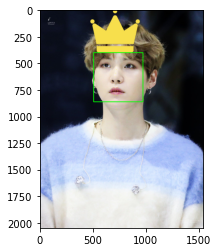

In [152]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

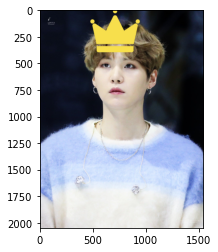

In [153]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()